# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [151]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [152]:
# Create URl 
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

# Set up list to hold the response info 
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#loop through the list of cities and get the data
print("Beginning Data Retrieval")
print("--------------------------")
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Citiy not found. Skipping...") 
        pass
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing record 1 of Set 1 | bonavista
Processing record 2 of Set 1 | laguna
Processing record 3 of Set 1 | hilo
Processing record 4 of Set 1 | mizdah
Processing record 5 of Set 1 | codrington
Processing record 6 of Set 1 | nikolskoye
Processing record 7 of Set 1 | palma gil
Processing record 8 of Set 1 | ushuaia
Processing record 9 of Set 1 | punta arenas
Citiy not found. Skipping...
Processing record 10 of Set 1 | pevek
Citiy not found. Skipping...
Processing record 11 of Set 1 | kaitangata
Processing record 12 of Set 1 | esperance
Processing record 13 of Set 1 | arucas
Processing record 14 of Set 1 | boende
Processing record 15 of Set 1 | port hardy
Processing record 16 of Set 1 | thompson
Processing record 17 of Set 1 | hithadhoo
Processing record 18 of Set 1 | miri
Processing record 19 of Set 1 | brainerd
Processing record 20 of Set 1 | hermanus
Processing record 21 of Set 1 | hobart
Processing record 22 of Set 1 | mataura
Proc

Citiy not found. Skipping...
Processing record 184 of Set 1 | ulaangom
Processing record 185 of Set 1 | arraial do cabo
Processing record 186 of Set 1 | bengkulu
Processing record 187 of Set 1 | porterville
Processing record 188 of Set 1 | itarema
Processing record 189 of Set 1 | harer
Processing record 190 of Set 1 | paamiut
Processing record 191 of Set 1 | semey
Processing record 192 of Set 1 | bethel
Processing record 193 of Set 1 | vostok
Processing record 194 of Set 1 | mar del plata
Processing record 195 of Set 1 | uzhur
Processing record 196 of Set 1 | dutlwe
Processing record 197 of Set 1 | fairbanks
Processing record 198 of Set 1 | hovd
Processing record 199 of Set 1 | evensk
Processing record 200 of Set 1 | khor
Processing record 201 of Set 1 | kargat
Processing record 202 of Set 1 | faya
Processing record 203 of Set 1 | wadena
Processing record 204 of Set 1 | kushima
Processing record 205 of Set 1 | pyu
Processing record 206 of Set 1 | pochutla
Processing record 207 of Set 1

Citiy not found. Skipping...
Processing record 371 of Set 1 | egvekinot
Processing record 372 of Set 1 | anandnagar
Processing record 373 of Set 1 | sembakung
Processing record 374 of Set 1 | grants
Processing record 375 of Set 1 | monrovia
Processing record 376 of Set 1 | suntar
Processing record 377 of Set 1 | san cristobal
Processing record 378 of Set 1 | darhan
Processing record 379 of Set 1 | juneau
Citiy not found. Skipping...
Processing record 380 of Set 1 | dalvik
Processing record 381 of Set 1 | fort nelson
Processing record 382 of Set 1 | bilma
Processing record 383 of Set 1 | west bay
Processing record 384 of Set 1 | antalaha
Processing record 385 of Set 1 | hanyang
Processing record 386 of Set 1 | itoman
Processing record 387 of Set 1 | ukiah
Processing record 388 of Set 1 | namsos
Processing record 389 of Set 1 | kungurtug
Processing record 390 of Set 1 | toyooka
Processing record 391 of Set 1 | kokopo
Processing record 392 of Set 1 | kruisfontein
Processing record 393 of 

Processing record 548 of Set 1 | lagos
Processing record 549 of Set 1 | huarmey
Citiy not found. Skipping...
Processing record 550 of Set 1 | noumea
Processing record 551 of Set 1 | khasan
Processing record 552 of Set 1 | kodinsk
Processing record 553 of Set 1 | churapcha
--------------------------
Data Retrieval Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [153]:
#weather data to dataframe
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
#export city data
weather_data.to_csv(r'my_weather_data.csv')

In [155]:
#Column count
weather_data.count()

City          553
Latitude      553
Longitude     553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [156]:
#Dataframe display
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.6499,-53.1147,58.17,96,100,17.65,CA,1595818800
1,Laguna,38.4210,-121.4238,88.32,29,5,12.50,US,1595818800
2,Hilo,19.7297,-155.0900,82.53,63,95,15.82,US,1595818800
3,Mizdah,31.4451,12.9801,70.47,50,0,2.64,LY,1595818800
4,Codrington,-38.2667,141.9667,54.55,74,60,20.40,AU,1595818800


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [157]:
#check to see if any humidity is higher then 100
new_weather_data =  weather_data[(weather_data["Humidity"] > 100)]
new_weather_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

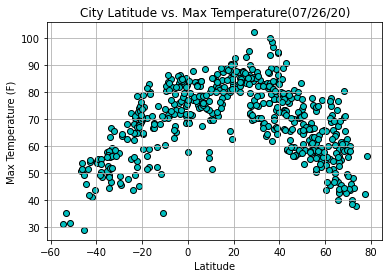

In [158]:
# Scatter plot lat vs temp
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp, facecolors = 'c', edgecolors = "black")
plt.title('City Latitude vs. Max Temperature(07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

## Latitude vs. Humidity Plot

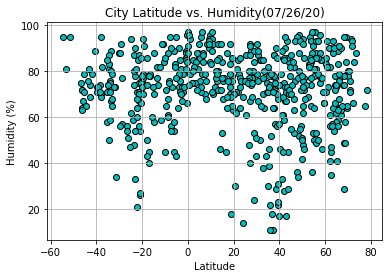

In [159]:
#scatter plot for lat vs humidity
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum,facecolors = 'c', edgecolors = "black")
plt.title('City Latitude vs. Humidity(07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

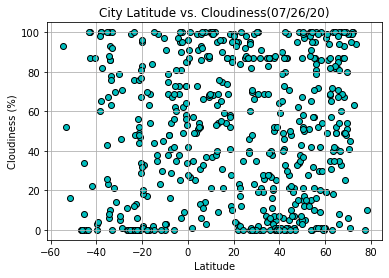

In [160]:
scathum = weather_data["Cloudiness"]

plt.scatter(scatlat,scathum,facecolors = 'c', edgecolors = "black")
plt.title('City Latitude vs. Cloudiness(07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudeCloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

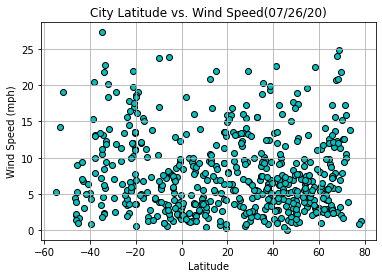

In [161]:
scathum = weather_data["Wind Speed"]

plt.scatter(scatlat,scathum,facecolors = 'c', edgecolors = "black")
plt.title('City Latitude vs. Wind Speed(07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.grid()
plt.show()

## Linear Regression

In [162]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")

In [163]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.6499,-53.1147,58.17,96,100,17.65,CA,1595818800
1,Laguna,38.4210,-121.4238,88.32,29,5,12.50,US,1595818800
2,Hilo,19.7297,-155.0900,82.53,63,95,15.82,US,1595818800
3,Mizdah,31.4451,12.9801,70.47,50,0,2.64,LY,1595818800
5,Nikolskoye,59.7035,30.7861,54.66,85,1,2.51,RU,1595818800


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6470550369981952


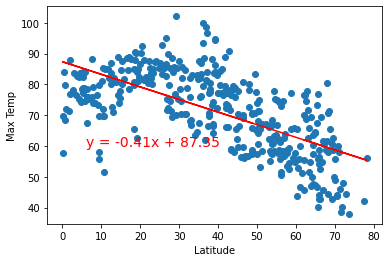

In [164]:
#Northern Hemi 
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,60))
plt.savefig('northerntemplat')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.78376963009471


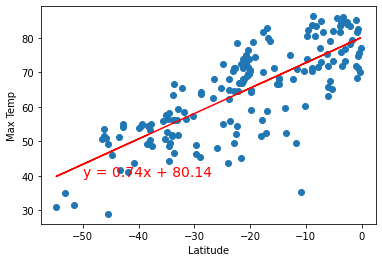

The high r value indicates a strong positive correlation between latitude and max temperature.


In [165]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-50,40))
plt.savefig('southerntemplat')
plt.show()
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.12088268420667539


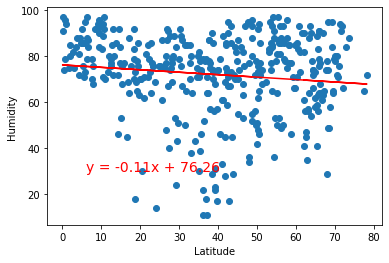

In [166]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))
plt.savefig('northernhumlat')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0445219303777523


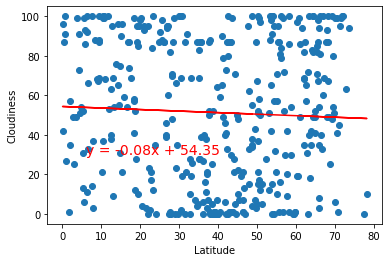

The low r values indicate a weak to no relationship between humidity and latitude.


In [167]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')
plt.show()
print("The low r values indicate a weak to no relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03236061837942243


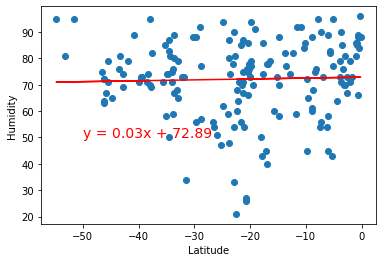

In [168]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(-50,50))

plt.savefig('southernhumlat')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13942425894018368


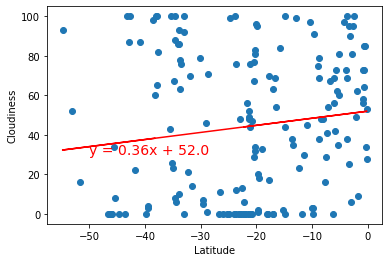

The low r values indicate a weak positive relationship between latitude and cloudiness.


In [169]:

x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-50,30))

plt.savefig('southerncloudlat')
plt.show()
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06735227441805496


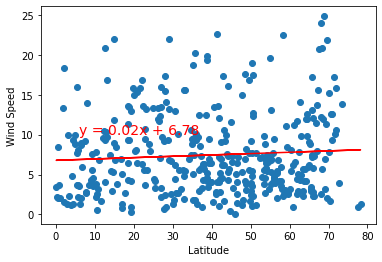

In [170]:

x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,10))

plt.savefig('northernwindlat')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15347965679954714


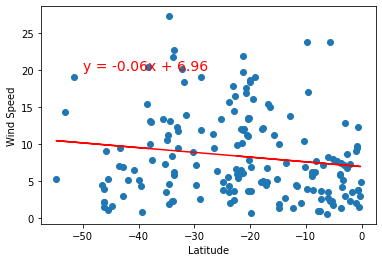

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


In [171]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,20))

plt.savefig('southernwindlat')
plt.show()
print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")